In [1]:
alldata <- read.table("data_banknote_authentication.txt",sep = ',')
dim(alldata)
colnames(alldata) <-c("variance", "skewness","curtosis", "entropy", "class")
alldata$class <- as.factor(alldata$class)

[1] 1372    5

In [2]:
testnum = sample(1372, size =472, replace = FALSE)
train = alldata[-testnum,]
test = alldata[testnum,]
#split train and testset
rownames(train) <- seq(length=nrow(train))
rownames(test) <- seq(length=nrow(test))
dim(train)
dim(test)

[1] 900   5

[1] 472   5

In [3]:
library（e1071）
library(penalizedSVM)
library(boot)
library(caret)
library(LiblineaR)

Loading required package: MASS
Loading required package: corpcor
Loading required package: statmod
Loading required package: tgp
Loading required package: mlegp
Loading required package: lhs
Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma

Loading required package: ggplot2


In [4]:
summary(alldata)

    variance          skewness          curtosis          entropy       
 Min.   :-7.0421   Min.   :-13.773   Min.   :-5.2861   Min.   :-8.5482  
 1st Qu.:-1.7730   1st Qu.: -1.708   1st Qu.:-1.5750   1st Qu.:-2.4135  
 Median : 0.4962   Median :  2.320   Median : 0.6166   Median :-0.5867  
 Mean   : 0.4337   Mean   :  1.922   Mean   : 1.3976   Mean   :-1.1917  
 3rd Qu.: 2.8215   3rd Qu.:  6.815   3rd Qu.: 3.1793   3rd Qu.: 0.3948  
 Max.   : 6.8248   Max.   : 12.952   Max.   :17.9274   Max.   : 2.4495  
 class  
 0:762  
 1:610  
        
        
        
        

In [33]:
tryCosts= c(1000,100,10,1,0.1,0.01,0.001)
bestCo= NA
bestAcc= 0

for(co in tryCosts){
acc=LiblineaR(data=train[1:4],target=train$class,type=5,cost=co,bias=1,cross=10,verbose=FALSE)
# cat("Results for C=",co," : ",1-acc," error.\n",sep="")
if(acc>bestAcc){
bestCost=co
bestAcc=acc
}
    }
model = LiblineaR(data = train[1:4],target=train$class,type=5,cost=bestCost,bias=1,verbose=FALSE)
p=predict(model, test[1:4])
# Display confusion matrix
res=table(p$predictions,test$class)
err=(res[2]+res[3])/sum(res)


Results for C=1000 : 0.008888889 error.
Results for C=100 : 0.007777778 error.
Results for C=10 : 0.007777778 error.
Results for C=1 : 0.008888889 error.
Results for C=0.1 : 0.008888889 error.
Results for C=0.01 : 0.01555556 error.
Results for C=0.001 : 0.1144444 error.


In [34]:
err

[1] 0.01271186

In [46]:
#1b_1 passive learning

df1 = data.frame(matrix(ncol = 90, nrow = 50))
for (j in 1:50){#50
    mysample<-data.frame()
    newtrain = train
 
for (i in 1:90){#90
#     tenpool = sample(nrow(newtrain),10,replace = FALSE)
#     mysample <- rbind(mysample, newtrain[tenpool,])
#     newtrain = newtrain[-tenpool,]
          
#     train_control<-trainControl(method="cv", number =10)#10fold cv
#     l1svm <- train(class~., data = mysample, trControl = train_control, method = "svmLinear3")
#     cm=confusionMatrix(predict(l1svm, newdata = test), test$class)
#     err=1-cm$overall['Accuracy']
# #     print(err)
# #     svmerr =svmerr+ err
#     df1[j,i]=err
tenpool = sample(nrow(newtrain), 10, replace= FALSE)
newsample = newtrain[tenpool,]
    while (nlevels(newsample$class) != 2){
            tenpool <- sample(nrow(newtrain), size = 10, replace = FALSE) #10 data points at a time
            newsample <- newtrain[tenpool, ]
        }
mysample = rbind(mysample, newsample)
newtrain = newtrain[-tenpool,]
tryCosts= c(1000,100,10,1,0.1,0.01,0.001)
bestCo= NA
bestAcc= 0

for(co in tryCosts){
acc=LiblineaR(data=mysample[1:4],target=mysample$class,type=5,cost=co,bias=1,cross=10,verbose=FALSE)
# cat("Results for C=",co," : ",1-acc," error.\n",sep="")
if(acc>bestAcc){
bestCost=co
bestAcc=acc
}
    }
model = LiblineaR(data = mysample[1:4],target=mysample$class,type=5,cost=bestCost,bias=1,verbose=FALSE)
p=predict(model, test[1:4])
# Display confusion matrix
res=table(p$predictions,test$class)
err=(res[2]+res[3])/sum(res)
df1[j,i]=err
}
    }

# plot(tmp, xlab="#", ylab="error",pch=15, col="blue")

In [47]:
df1

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0.44491525,0.06355932,0.02330508,0.023305085,0.012711864,0.012711864,0.012711864,0.012711864,0.012711864,0.012711864,...,0.02118644,0.02118644,0.02118644,0.02118644,0.02118644,0.01271186,0.01271186,0.02118644,0.01271186,0.01271186
0.40466102,0.05720339,0.08898305,0.027542373,0.019067797,0.019067797,0.019067797,0.019067797,0.027542373,0.019067797,...,0.02118644,0.01271186,0.01271186,0.02118644,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186
0.12711864,0.02966102,0.03177966,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,...,0.01271186,0.02118644,0.02118644,0.02118644,0.02118644,0.01271186,0.02118644,0.02118644,0.01271186,0.02118644
0.12076271,0.02330508,0.02330508,0.023305085,0.021186441,0.021186441,0.021186441,0.019067797,0.019067797,0.019067797,...,0.02118644,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186
0.17161017,0.04872881,0.02754237,0.025423729,0.019067797,0.019067797,0.019067797,0.016949153,0.012711864,0.014830508,...,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.02118644
0.26059322,0.05084746,0.06144068,0.040254237,0.046610169,0.048728814,0.048728814,0.033898305,0.025423729,0.033898305,...,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186
0.13771186,0.11652542,0.02118644,0.025423729,0.023305085,0.025423729,0.023305085,0.025423729,0.021186441,0.023305085,...,0.01271186,0.01271186,0.01483051,0.01271186,0.02118644,0.02118644,0.01271186,0.01271186,0.02118644,0.02118644
0.10169492,0.09110169,0.05508475,0.025423729,0.021186441,0.025423729,0.025423729,0.019067797,0.019067797,0.019067797,...,0.02118644,0.02118644,0.02118644,0.02118644,0.02118644,0.02118644,0.02118644,0.01271186,0.01271186,0.02118644
0.02542373,0.03177966,0.02542373,0.033898305,0.036016949,0.027542373,0.010593220,0.027542373,0.019067797,0.023305085,...,0.01271186,0.02118644,0.01271186,0.01271186,0.01271186,0.02118644,0.01271186,0.01271186,0.02118644,0.01271186
0.24364407,0.23093220,0.02542373,0.023305085,0.021186441,0.027542373,0.031779661,0.033898305,0.027542373,0.016949153,...,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.01271186,0.02118644,0.01271186,0.01271186,0.02118644


In [48]:
write.csv(df1, file = "df1.csv")

In [5]:

# tmp2 <- seq(0,0,length = 50)
df2 = data.frame(matrix(ncol = 90, nrow = 50))
for (j in 1:50){
#     svmerr=0
#     newtrain = train
#     newtrain$dist = 0
#     print(dim(newtrain))
#     mysample<-data.frame()#1b_2 active learning
#     tenpool = sample(nrow(newtrain),10,replace = FALSE)
#     mysample <- rbind(mysample, newtrain[tenpool,])
#     newtrain = newtrain[-tenpool,]
    mysample <-data.frame()
    newtrain=train
    newtrain$dist = 0
#     print(dim(newtrain))
    tenpool = sample(nrow(newtrain), 10, replace= FALSE)
    newsample = newtrain[tenpool,]
#     print(dim(newsample))
    while (nlevels(newsample$class) != 2){
            tenpool <- sample(nrow(newtrain), size = 10, replace = FALSE) #10 data points at a time
            newsample = newtrain[tenpool, ]
#             print(dim(newsample))
        }
    mysample = rbind(mysample, newsample)
    newtrain = newtrain[-tenpool,]
tryCosts= c(1000,100,10,1,0.1,0.01,0.001)
bestCo= NA
bestAcc= 0

for(co in tryCosts){
acc=LiblineaR(data=mysample[1:4],target=mysample$class,type=5,cost=co,bias=1,cross=10,verbose=FALSE)
# cat("Results for C=",co," : ",1-acc," error.\n",sep="")
if(acc>bestAcc){
bestCost=co
bestAcc=acc
}
    }
model = LiblineaR(data = mysample[1:4],target=mysample$class,type=5,cost=bestCost,bias=1,verbose=FALSE)
p=predict(model, test[1:4])
# Display confusion matrix
res=table(p$predictions,test$class)
err=(res[2]+res[3])/sum(res)
df2[j,1]= err

#     print(dim(mysample))
#     print(dim(newtrain))
    for (i in 2:90){
#     print(dim(mysample))
#     print(dim(newtrain))

#     train_control<-trainControl(method="cv", number =10)#10fold cv
#     l1svm <- train(class~., data = mysample, trControl = train_control, method = "svmLinear3")
# # #     print(l1svm$results)
# # #     print(l1svm$bestTune)
#     test$dist = 0
#     cm=confusionMatrix(predict(l1svm, newdata = test), test$class)
#     err=1-cm$overall['Accuracy']
# #     print(err)
# #     svmerr =svmerr+ err  
tryCosts= c(1000,100,10,1,0.1,0.01,0.001)
bestCo= NA
bestAcc= 0

for(co in tryCosts){
acc=LiblineaR(data=mysample[1:4],target=mysample$class,type=5,cost=co,bias=1,cross=10,verbose=FALSE)
# cat("Results for C=",co," : ",1-acc," error.\n",sep="")
if(acc>bestAcc){
bestCost=co
bestAcc=acc
}
    }
model = LiblineaR(data = mysample[1:4],target=mysample$class,type=5,cost=bestCost,bias=1,verbose=FALSE)
p=predict(model, test[1:4])
# Display confusion matrix
res=table(p$predictions,test$class)
err=(res[2]+res[3])/sum(res)
df2[j,i]= err

    
    
    y=model$W[1:4]
    z= model$W[5]
    newtrain$dist<-apply(newtrain, 1, function(x) abs(sum(as.numeric(x[1:4]) * y)+z))
    for (k in 1:10){
        a = which(newtrain$dist==(min(newtrain$dist)))
        if (length(a)!=1){
            a = a[1]
        }
#         print(a)
        mysample=rbind(mysample,newtrain[a,])
        newtrain = newtrain[-a,]        
        }
#     print(dim(newtrain))
}
}
# plot(tmp2, xlab="#", ylab="error",pch=15, col="blue")

In [6]:
df2

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0.03601695,0.02754237,0.03813559,0.019067797,0.006355932,0.006355932,0.008474576,0.010593220,0.010593220,0.010593220,...,0.008474576,0.008474576,0.014830508,0.008474576,0.008474576,0.014830508,0.008474576,0.014830508,0.014830508,0.014830508
0.26694915,0.26271186,0.11864407,0.033898305,0.031779661,0.050847458,0.029661017,0.006355932,0.006355932,0.006355932,...,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.014830508,0.008474576,0.008474576
0.18008475,0.12076271,0.04661017,0.059322034,0.019067797,0.010593220,0.006355932,0.014830508,0.010593220,0.008474576,...,0.014830508,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576
0.02966102,0.03601695,0.02966102,0.010593220,0.008474576,0.010593220,0.010593220,0.012711864,0.008474576,0.010593220,...,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.014830508,0.014830508,0.008474576
0.03177966,0.03601695,0.02118644,0.021186441,0.008474576,0.006355932,0.008474576,0.010593220,0.010593220,0.010593220,...,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.014830508,0.014830508
0.08474576,0.08474576,0.03601695,0.031779661,0.012711864,0.008474576,0.006355932,0.008474576,0.010593220,0.010593220,...,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576
0.21186441,0.20550847,0.09533898,0.040254237,0.019067797,0.010593220,0.008474576,0.010593220,0.010593220,0.010593220,...,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.014830508,0.008474576,0.008474576,0.008474576
0.11652542,0.09533898,0.06567797,0.031779661,0.025423729,0.010593220,0.006355932,0.008474576,0.010593220,0.012711864,...,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576
0.26059322,0.30932203,0.06779661,0.025423729,0.023305085,0.012711864,0.012711864,0.008474576,0.010593220,0.010593220,...,0.014830508,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576,0.008474576
0.30508475,0.28601695,0.04661017,0.029661017,0.025423729,0.006355932,0.008474576,0.010593220,0.008474576,0.010593220,...,0.008474576,0.008474576,0.008474576,0.014830508,0.008474576,0.008474576,0.014830508,0.008474576,0.008474576,0.008474576


In [7]:
write.csv(df2, file = "df2.csv")

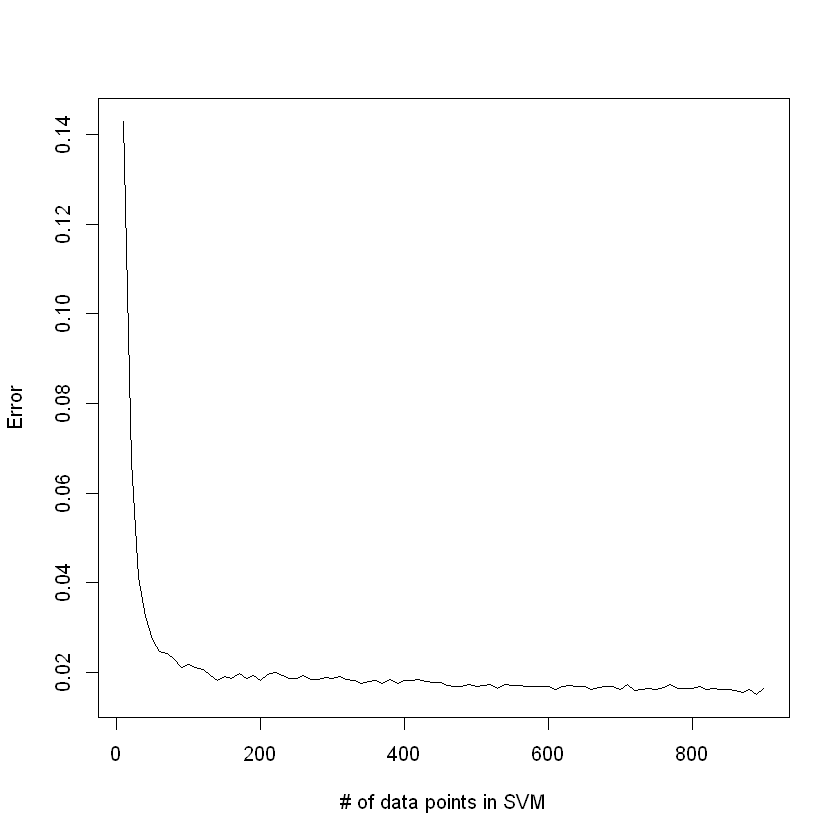

In [8]:
mydf1 = read.csv("df1.csv")


meanslist = seq(0,0,length = 90)
svmlist = seq(10,900, length = 90)
for (i in 1:90){
    meanslist[i] = mean(as.numeric(mydf1[,i+1]))
    
}


plot(svmlist, meanslist, type="l",xlab="# of data points in SVM", ylab="Error")


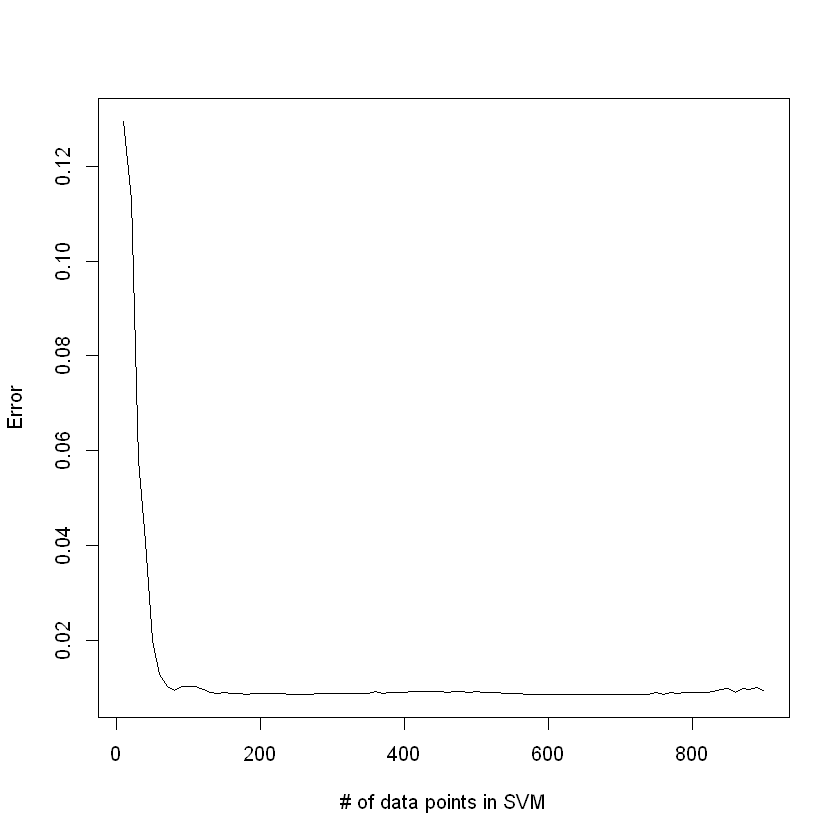

In [9]:
mydf2 = read.csv("df2.csv")


meanslist = seq(0,0,length = 90)
svmlist = seq(10,900, length = 90)
for (i in 1:90){
    meanslist[i] = mean(as.numeric(mydf2[,i+1]))
    
}


plot(svmlist, meanslist, type="l",xlab="# of data points in SVM", ylab="Error", )


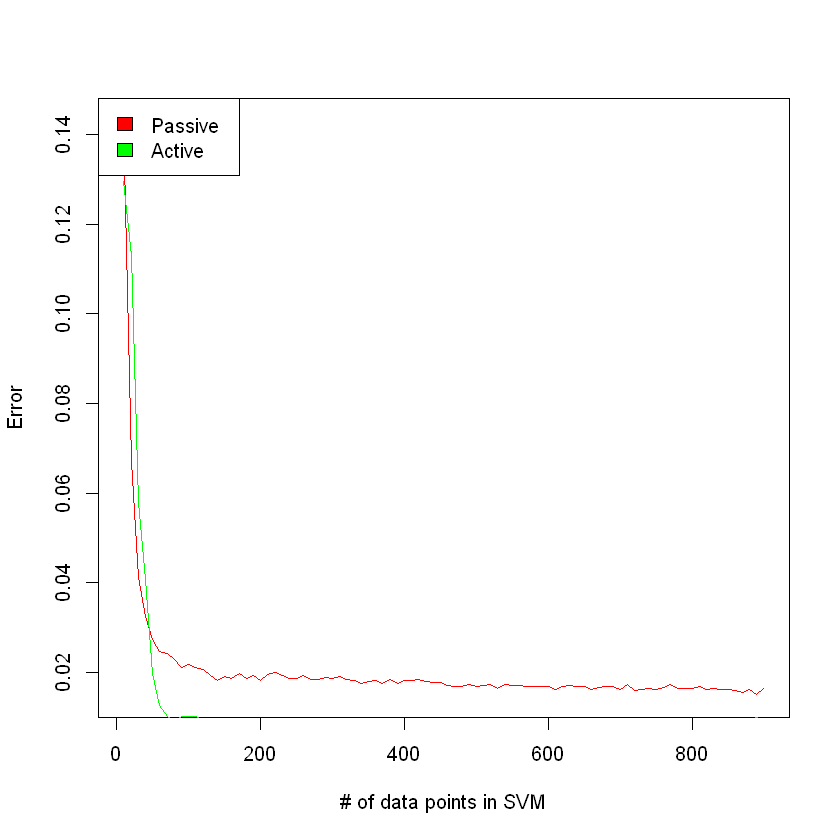

In [10]:
#plot of Passvie learning
mydf1 = read.csv("df1.csv")


meanslist = seq(0,0,length = 90)
svmlist = seq(10,900, length = 90)
for (i in 1:90){
    meanslist[i] = mean(as.numeric(mydf1[,i+1]))
    
}


plot(svmlist, meanslist, type="l",xlab="# of data points in SVM", ylab="Error", col="red")

#Plot of Active Learning
mydf2 = read.csv("df2.csv")


meanslist = seq(0,0,length = 90)
svmlist = seq(10,900, length = 90)
for (i in 1:90){
    meanslist[i] = mean(as.numeric(mydf2[,i+1]))
    
}


lines(svmlist, meanslist, type="l",xlab="# of data points in SVM", ylab="Error",col="green")
legend("topleft",
c("Passive","Active"),
fill=c("red", "green")
)